In [1]:
#!pip install mercury
#!pip install oracledb
#!pip install matplotlib
#!pip install ipywidgets matplotlib
#!pip install ipympl


In [2]:
#%matplotlib notebook 
%matplotlib widget
#make the plots interactive

In [3]:
import mercury as mr # for widgets
import oracledb
import random # for random data generation
from matplotlib import pyplot as plt # for chart
import time
import numpy as np
from ipywidgets import interactive

In [4]:
from pythonSqlQuery import *
from plotData import *

In [5]:
#data =execute_sql_script("../sqlScripts/selectAccidentData.sql")
#labels=["Severity", "Distance (mi)"]


In [6]:
#data

In [7]:
#plot(data,labels,"Base graph")

In [8]:
raw_data=execute_sql_script("../sqlScripts/Query1_WindDirection.sql") 

Successfully executed script: ../sqlScripts/Query1_WindDirection.sql


In [9]:
#raw_data[0]
#dates = [np.datetime64(f"{year}-{month:02d}") for year, month, *_ in raw_data[0]]
#dates

In [10]:
towards_data = [row[:-1] for row in raw_data[0] if row[5][0]=="t"] # Used to grab all of the values that are towards the vehicle
#towards_data

In [11]:
against_data = [row[:-1] for row in raw_data[0] if row[5][0]=="a"] # Used to grab all of the values against the vehicle
perpendicular_data = [row[:-1] for row in raw_data[0] if row[5][0]=="p"] # Used to grab all of the values perpendicular to the vehicle
#labels=["Towards the Data"]

In [12]:
#against_data

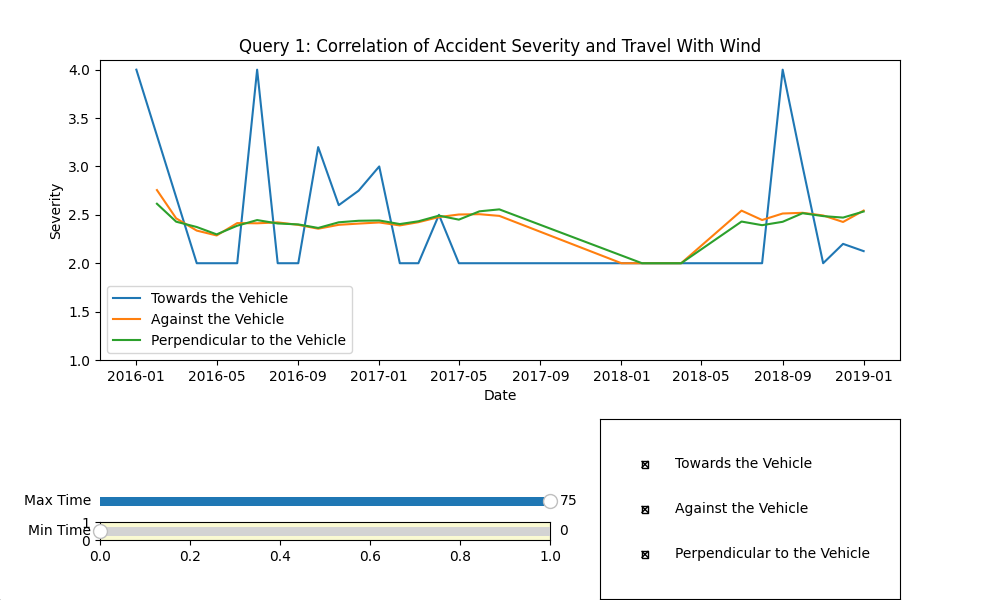

In [13]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1SeverityPlot(raw_data, labels,"Query 1: Correlation of Accident Severity and Travel With Wind")

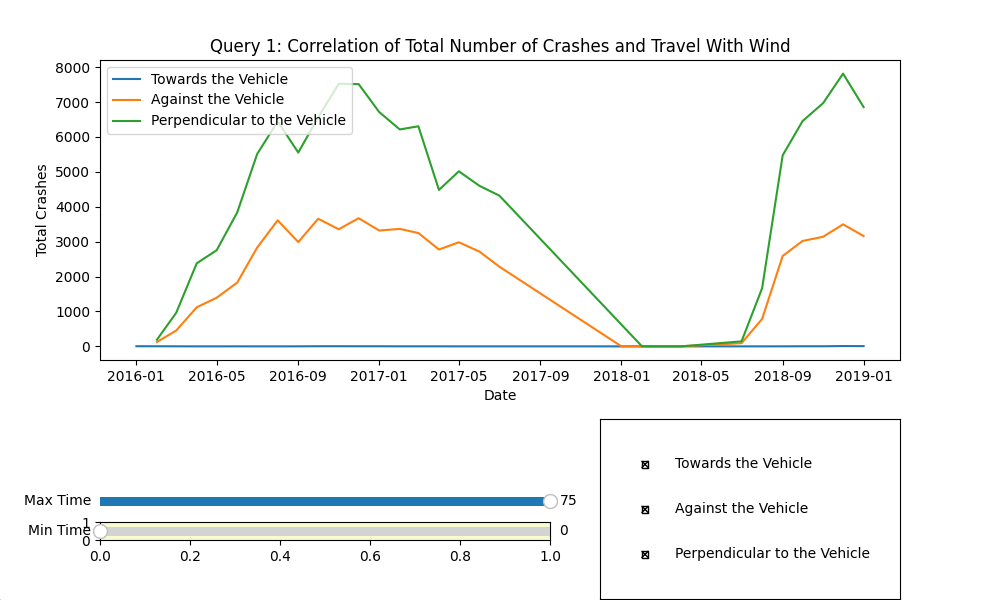

In [14]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1CrashesPlot(raw_data, labels,"Query 1: Correlation of Total Number of Crashes and Travel With Wind")

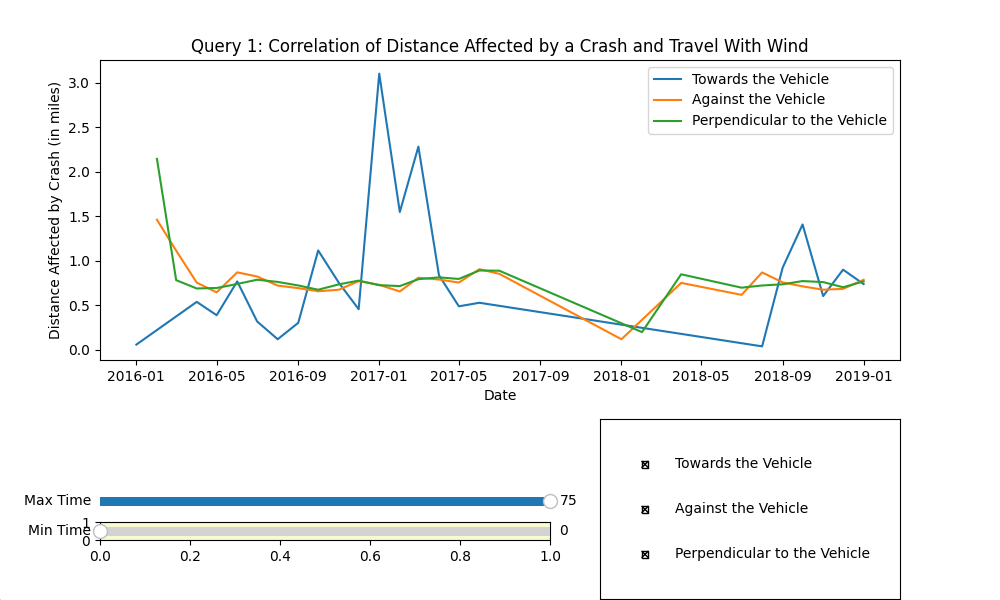

In [15]:
labels=["Towards the Vehicle", "Against the Vehicle", "Perpendicular to the Vehicle"]
Query1DistancePlot(raw_data, labels,"Query 1: Correlation of Distance Affected by a Crash and Travel With Wind")